In [82]:
!pip install pandas

import pandas as pd

In [90]:
  
  !conda install -c conda-forge fbprophet --yes
 


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [107]:
from fbprophet import Prophet


In [139]:
data = pd.read_csv("MSFT (2).csv")      #predictive model file, data taken from 01/20/2016 - 01/20/2020
data2 = pd.read_csv("MSFT (3).csv")     #actual model file, data taken from 01/20/2020 - 09/05/2020

from fbprophet.plot import plot_plotly, plot_components_plotly

data=data.rename(columns={'Date':'ds', 'Close':'y'})
data2=data2.rename(columns={'Date':'ds', 'Close':'y'})

In [140]:

data.head()


,ds,Open,High,Low,y,Adj Close,Volume
0,2016-01-18,51.480000,52.330002,49.099998,52.290001,47.841209,184584500
1,2016-01-25,51.939999,55.090000,51.020000,55.090000,50.402992,246509200
2,2016-02-01,54.880001,55.090000,49.560001,50.160000,45.892437,267078200
3,2016-02-08,49.549999,50.680000,48.189999,50.500000,46.203510,227389900
4,2016-02-15,50.900002,52.950001,50.130001,51.820000,47.411190,138815300


In [166]:
m = Prophet(yearly_seasonality = True)
m.fit(data)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [167]:
future = m.make_future_dataframe(periods = 228)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()



,ds,yhat,yhat_lower,yhat_upper
432,2020-08-24,190.030379,184.117885,195.912257
433,2020-08-25,190.168876,184.436895,196.093299
434,2020-08-26,190.306390,184.228997,196.199505
435,2020-08-27,190.442924,184.417019,196.424777
436,2020-08-28,190.578623,184.666990,196.405632


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0, 0.5, 'Close of stock')

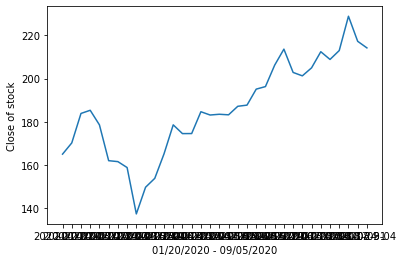

In [168]:
#plots actual stock values from the day, the first case of coronavirus was reported in the US.
import matplotlib.pyplot as plt

plt.plot(data2.ds,data2.y)
plt.xlabel('01/20/2020 - 09/05/2020')
plt.ylabel('Close of stock')

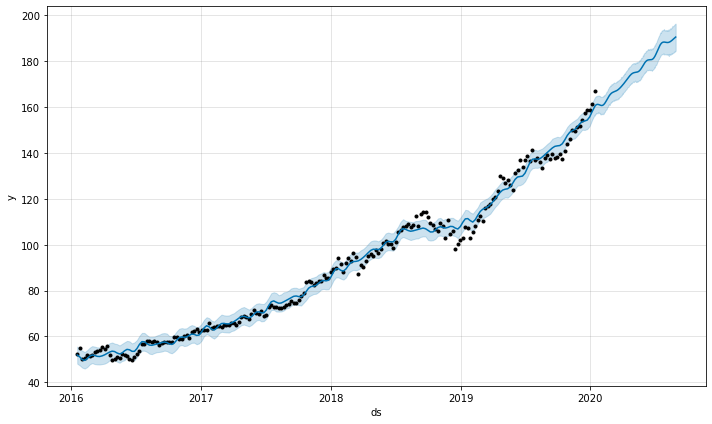

In [169]:
#predictive model graped (shows how it predicts stock values up till 5th september 2020, if we were to graph this hypothetically on 20th Jan 2020.)
fig1 = m.plot(forecast)


In [170]:
data2.tail()

,ds,Open,High,Low,y,Adj Close,Volume
29,2020-08-10,211.669998,211.880005,203.139999,208.899994,208.396240,141752200
30,2020-08-17,209.600006,216.250000,208.910004,213.020004,212.506317,132379400
31,2020-08-24,214.789993,231.149994,212.429993,228.910004,228.910004,171999700
32,2020-08-31,227.000000,232.860001,214.960007,217.300003,217.300003,146795100
33,2020-09-04,215.100006,218.359894,205.190002,214.250000,214.250000,56783337


In [171]:
forecast.tail()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
432,2020-08-24,190.084363,184.117885,195.912257,185.495902,194.402690,-0.053984,-0.053984,-0.053984,-0.053984,-0.053984,-0.053984,0.0,0.0,0.0,190.030379
433,2020-08-25,190.223759,184.436895,196.093299,185.617221,194.582877,-0.054883,-0.054883,-0.054883,-0.054883,-0.054883,-0.054883,0.0,0.0,0.0,190.168876
434,2020-08-26,190.363156,184.228997,196.199505,185.726422,194.760990,-0.056766,-0.056766,-0.056766,-0.056766,-0.056766,-0.056766,0.0,0.0,0.0,190.306390
435,2020-08-27,190.502553,184.417019,196.424777,185.828127,194.938068,-0.059629,-0.059629,-0.059629,-0.059629,-0.059629,-0.059629,0.0,0.0,0.0,190.442924
436,2020-08-28,190.641950,184.666990,196.405632,185.941048,195.113708,-0.063327,-0.063327,-0.063327,-0.063327,-0.063327,-0.063327,0.0,0.0,0.0,190.578623


In [1]:
msft_impact = (214.250000-190.578623)/190.578623 * 100
print("Microsoft's stocks have been impacted against the normal flow by Covid-19(from when the first case was reported in the USA) by\n",msft_impact,"%")



Microsoft's stocks have been impacted against the normal flow by Covid-19(from when the first case was reported in the USA) by
 12.420793385625421 %
